In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ieee-eui-data-science-bootcamp/sample_submission.csv
/kaggle/input/ieee-eui-data-science-bootcamp/data_description.txt
/kaggle/input/ieee-eui-data-science-bootcamp/train.csv
/kaggle/input/ieee-eui-data-science-bootcamp/test.csv


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
df = pd.read_csv("/kaggle/input/ieee-eui-data-science-bootcamp/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_test = pd.read_csv("/kaggle/input/ieee-eui-data-science-bootcamp/test.csv")
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [146]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [147]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_columns = [column for column in df.columns if df[column].dtype.name == 'object']
for column in categorical_columns:
   df[column] = le.fit_transform(df[column])

In [148]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_columns = [column for column in df_test.columns if df_test[column].dtype.name == 'object']
for column in categorical_columns:
   df_test[column] = le.fit_transform(df_test[column])

In [149]:
#df_test = df_test.replace("NaN"," ")

#df_test = df_test.fillna(df_test.mode())

In [150]:
df_test = df_test.fillna(df_test.mean())

In [151]:
df_test.isnull().sum().sum()

0

In [152]:
df.shape

(1460, 81)

In [153]:
df_test.shape

(1459, 80)

In [154]:
df.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,3.028767,70.049958,10516.828082,0.995890,1.903425,1.942466,2.777397,0.000685,3.019178,0.062329,12.251370,2.031507,2.008219,0.493151,3.038356,6.099315,5.575342,1971.267808,1984.865753,1.410274,1.075342,9.624658,10.339726,2.271918,103.685262,2.539726,3.733562,1.396575,2.305479,2.842466,2.310274,2.815068,443.639726,4.741781,46.549315,567.240411,1057.429452,1.036301,1.538356,0.934932,3.682877,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,2.339726,6.517808,5.749315,0.613014,3.804795,2.485616,1978.506164,1.284247,1.767123,472.980137,3.927397,3.960959,1.856164,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,2.991096,3.504795,3.922603,43.489041,6.321918,2007.815753,7.513014,3.770548,180921.195890
std,421.610009,42.300571,0.632017,24.284752,9981.264932,0.063996,0.394776,1.409156,0.707666,0.026171,1.622634,0.276232,6.013735,0.868515,0.259040,1.198277,1.911305,1.382997,1.112799,30.202904,20.645407,0.834998,0.599127,3.197659,3.540570,0.932635,181.066207,0.693995,0.731807,0.722394,0.899225,0.676527,1.165663,1.874410,456.098091,0.946713,161.319273,441.866955,438.705324,0.295124,1.739524,0.246731,1.051834,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.830161,1.625393,0.979659,0.644666,1.398954,1.933206,24.689725,0.892831,0.747315,213.804841,0.647822,0.566832,0.496592,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,0.140703,1.082912,0.404103,496.123024,2.703626,1.328095,1.552100,1.100854,79442.502883
min,1.000000,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [156]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

<Axes: >

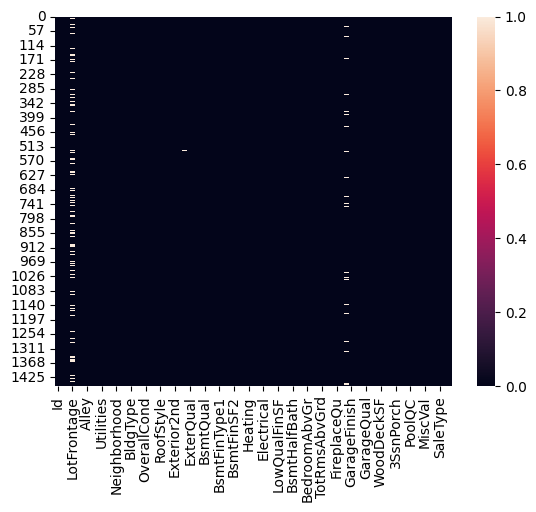

In [157]:
import seaborn as sns
sns.heatmap(df.isnull())

In [158]:
df.duplicated().sum()

0

In [159]:
#df = df.replace(" ","nan")

df = df.fillna(df.mean())

In [160]:
df.isnull().sum().sum()

0

<Axes: >

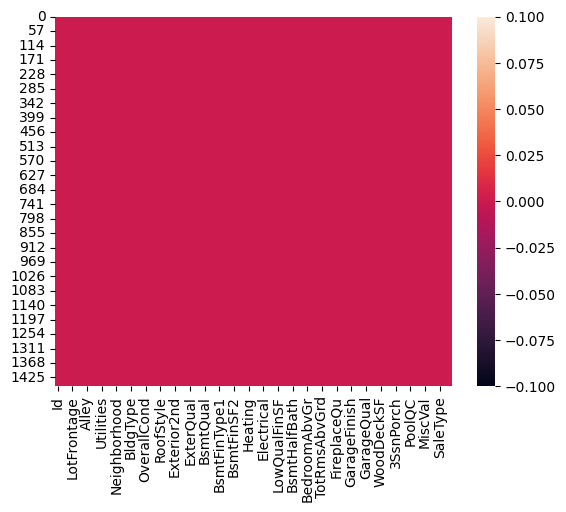

In [161]:
import seaborn as sns
sns.heatmap(df.isnull())

In [162]:
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       111
LotArea          1073
Street              2
Alley               3
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        328
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            5
BsmtCond            5
BsmtExposure        5
BsmtFinType1        7
BsmtFinSF1        637
BsmtFinType2        7
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          6
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [163]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

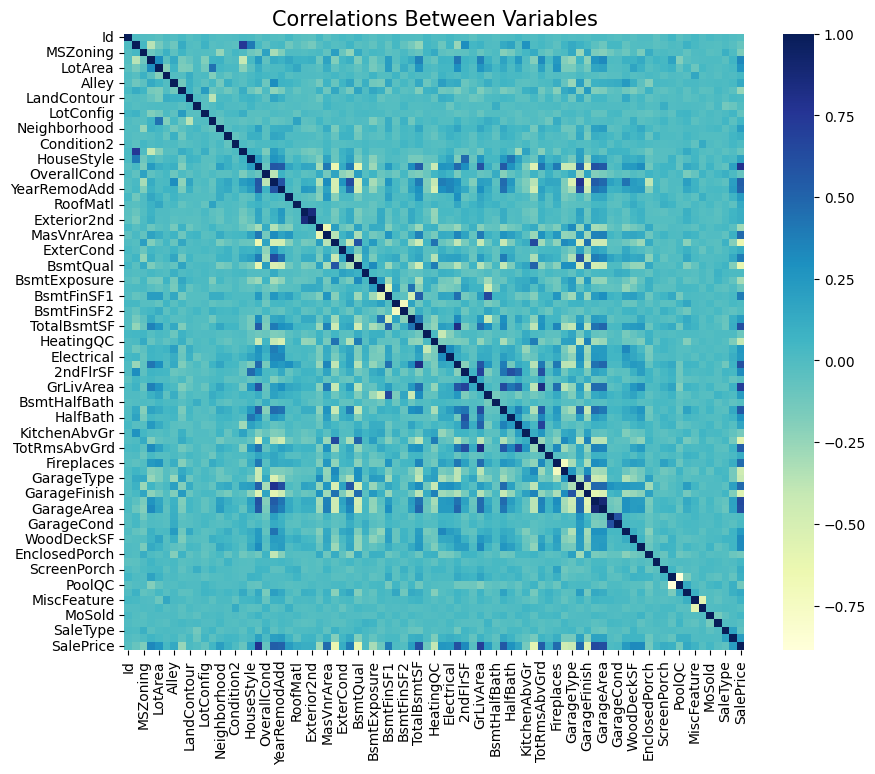

In [164]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="YlGnBu")
plt.title("Correlations Between Variables", size=15)
plt.show()


In [165]:
categorical_columns = [column for column in df.columns if df[column].dtype.name == 'float64']
for column in categorical_columns:

  print("'",column,"'",",")

' LotFrontage ' ,
' MasVnrArea ' ,
' GarageYrBlt ' ,


In [166]:
categorical_columns = [column for column in df.columns if df[column].dtype.name == 'int64']
for column in categorical_columns:

  print("'",column,"'",",")

' Id ' ,
' MSSubClass ' ,
' MSZoning ' ,
' LotArea ' ,
' Street ' ,
' Alley ' ,
' LotShape ' ,
' LandContour ' ,
' Utilities ' ,
' LotConfig ' ,
' LandSlope ' ,
' Neighborhood ' ,
' Condition1 ' ,
' Condition2 ' ,
' BldgType ' ,
' HouseStyle ' ,
' OverallQual ' ,
' OverallCond ' ,
' YearBuilt ' ,
' YearRemodAdd ' ,
' RoofStyle ' ,
' RoofMatl ' ,
' Exterior1st ' ,
' Exterior2nd ' ,
' MasVnrType ' ,
' ExterQual ' ,
' ExterCond ' ,
' Foundation ' ,
' BsmtQual ' ,
' BsmtCond ' ,
' BsmtExposure ' ,
' BsmtFinType1 ' ,
' BsmtFinSF1 ' ,
' BsmtFinType2 ' ,
' BsmtFinSF2 ' ,
' BsmtUnfSF ' ,
' TotalBsmtSF ' ,
' Heating ' ,
' HeatingQC ' ,
' CentralAir ' ,
' Electrical ' ,
' 1stFlrSF ' ,
' 2ndFlrSF ' ,
' LowQualFinSF ' ,
' GrLivArea ' ,
' BsmtFullBath ' ,
' BsmtHalfBath ' ,
' FullBath ' ,
' HalfBath ' ,
' BedroomAbvGr ' ,
' KitchenAbvGr ' ,
' KitchenQual ' ,
' TotRmsAbvGrd ' ,
' Functional ' ,
' Fireplaces ' ,
' FireplaceQu ' ,
' GarageType ' ,
' GarageFinish ' ,
' GarageCars ' ,
' GarageArea ' ,
'

In [167]:
from sklearn.preprocessing import StandardScaler

stand_data=[
'LotFrontage' ,
'MasVnrArea' ,
'GarageYrBlt' ,'MSSubClass' ,
'MSZoning' ,
'LotArea' ,
'Street' ,
'Alley' ,
'LotShape' ,
'LandContour' ,
'Utilities' ,
'LotConfig' ,
'LandSlope' ,
'Neighborhood' ,
'Condition1' ,
'Condition2' ,
'BldgType' ,
'HouseStyle' ,
'OverallQual' ,
'OverallCond' ,
'YearBuilt' ,
'YearRemodAdd' ,
'RoofStyle' ,
'RoofMatl' ,
'Exterior1st' ,
'Exterior2nd' ,
'MasVnrType' ,
'ExterQual' ,
'ExterCond' ,
'Foundation' ,
'BsmtQual' ,
'BsmtCond' ,
'BsmtExposure' ,
'BsmtFinType1' ,
'BsmtFinSF1' ,
'BsmtFinType2' ,
'BsmtFinSF2' ,
'BsmtUnfSF' ,
'TotalBsmtSF' ,
'Heating' ,
'HeatingQC' ,
'CentralAir' ,
'Electrical' ,
'1stFlrSF' ,
'2ndFlrSF' ,
'LowQualFinSF' ,
'GrLivArea' ,
'BsmtFullBath' ,
'BsmtHalfBath' ,
'FullBath' ,
'HalfBath' ,
'BedroomAbvGr' ,
'KitchenAbvGr' ,
'KitchenQual' ,
'TotRmsAbvGrd' ,
'Functional' ,
'Fireplaces' ,
'FireplaceQu' ,
'GarageType' ,
'GarageFinish' ,
'GarageCars' ,
'GarageArea' ,
'GarageQual' ,
'GarageCond' ,
'PavedDrive' ,
'WoodDeckSF' ,
'OpenPorchSF'  ,
'EnclosedPorch' ,
'3SsnPorch' ,
'ScreenPorch' ,
'PoolArea' ,
'PoolQC' ,
'Fence' ,
'MiscFeature' ,
'MiscVal' ,
'MoSold' ,
'YrSold' ,
'SaleType' ,
'SaleCondition']
    
scaler = StandardScaler()
df[stand_data] = scaler.fit_transform(df[stand_data])

df[stand_data].head()

,LotFrontage,MasVnrArea,GarageYrBlt,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-0.229372,0.511418,1.021157,0.073375,-0.045532,-0.207142,0.064238,0.244717,0.750731,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,-0.411691,1.026689,0.651479,-0.517200,1.050994,0.878668,-0.491516,-0.125797,0.743092,0.751626,-1.364257,-0.777976,0.364207,0.835599,-0.339830,0.232937,0.591905,-0.434989,0.575425,0.272847,-0.288653,-0.944591,-0.459303,-0.123046,-0.884658,0.263813,0.301599,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.409369,0.912210,0.255978,-0.951226,0.854650,-0.768736,-0.318475,0.311725,0.351000,0.11211,0.0689,0.289745,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,0.063305,0.457447,0.191594,-0.087688,-1.599111,0.138777,0.313867,0.208502
1,0.451936,-0.574410,-0.104483,-0.872563,-0.045532,-0.091886,0.064238,0.244717,0.750731,0.314667,-0.02618,-0.628316,-0.225716,1.954302,-1.188074,-0.03174,-0.411691,-0.543457,-0.071836,2.179628,0.156734,-0.429577,-0.491516,-0.125797,-0.508251,-0.661060,0.780940,0.663451,0.364207,-0.549162,-0.339830,0.232937,-1.124444,-1.502357,1.171992,0.272847,-0.288653,-0.641228,0.466465,-0.123046,-0.884658,0.263813,0.301599,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,0.795629,-0.318683,0.255978,0.600495,0.139585,-0.768736,-0.318475,0.311725,-0.060731,0.11211,0.0689,0.289745,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,0.063305,0.457447,0.191594,-0.087688,-0.489110,-0.614439,0.313867,0.208502
2,-0.093110,0.323060,0.937776,0.073375,-0.045532,0.073480,0.064238,0.244717,-1.378933,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,-0.411691,1.026689,0.651479,-0.517200,0.984752,0.830215,-0.491516,-0.125797,0.743092,0.751626,-1.364257,-0.777976,0.364207,0.835599,-0.339830,0.232937,-0.266269,-0.434989,0.092907,0.272847,-0.288653,-0.301643,-0.313369,-0.123046,-0.884658,0.263813,0.301599,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.409369,-0.318683,0.255978,0.600495,0.139585,-0.768736,-0.318475,0.311725,0.631726,0.11211,0.0689,0.289745,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,0.063305,0.457447,0.191594,-0.087688,0.990891,0.138777,0.313867,0.208502
3,-0.456474,-0.574410,0.812705,0.309859,-0.045532,-0.096897,0.064238,0.244717,-1.378933,0.314667,-0.02618,-1.861302,-0.225716,-1.039872,-0.036289,-0.03174,-0.411691,1.026689,0.651479,-0.517200,-1.863632,-0.720298,-0.491516,-0.125797,1.055928,1.316701,0.780940,0.663451,0.364207,-1.933923,0.772619,-2.724353,0.591905,-1.502357,-0.499274,0.272847,-0.288653,-0.061670,-0.687324,-0.123046,0.265476,0.263813,0.301599,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,-0.409369,0.296763,0.255978,0.600495,-1.290545,1.301075,0.801942,1.650307,0.790804,0.11211,0.0689,0.289745,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,0.063305,0.457447,0.191594,-0.087688,-1.599111,-1.367655,0.313867,-3.426284
4,0.633618,1.364570,0.896086,0.073375,-0.045532,0.375148,0.064238,0.244717,-1.378933,0.314667,-0.02618,-0.628316,-0.225716,0.457215,-0.036289,-0.03174,-0.411691,1.026

In [168]:
#df.dropna(inplace=True)

In [189]:
X = df.drop("SalePrice", axis=1)
Y = df["SalePrice"]

[2.94623932e-02 1.50305765e-02 8.55312110e-03 2.51206020e-02
 2.61484744e-02 2.54590840e-04 3.83007879e-03 1.41137149e-02
 6.43922799e-03 4.35407013e-05 1.50887380e-02 3.56029305e-03
 2.07051316e-02 8.34527172e-03 6.70399363e-04 6.67629882e-03
 1.25977371e-02 1.97262117e-02 1.56285197e-02 2.53270830e-02
 2.50071955e-02 1.13943074e-02 1.06124146e-03 1.75805801e-02
 1.81910040e-02 1.42215990e-02 1.75052286e-02 7.87382046e-03
 7.58766544e-03 1.03954482e-02 1.15197621e-02 6.93385870e-03
 1.59310803e-02 1.92229405e-02 2.32465509e-02 7.10052739e-03
 6.99281748e-03 2.66951428e-02 2.65835342e-02 1.31064095e-03
 1.53631974e-02 3.26895328e-03 4.60930709e-03 2.75554829e-02
 1.64246223e-02 1.40775120e-03 2.86086124e-02 1.34302192e-02
 3.87538530e-03 9.19656779e-03 1.07849576e-02 1.64941282e-02
 2.14711121e-03 1.21891054e-02 2.26673720e-02 4.33606632e-03
 1.31186968e-02 1.45205326e-02 1.20893336e-02 2.38093109e-02
 1.56228794e-02 1.25472920e-02 2.64476287e-02 4.24752496e-03
 3.92231235e-03 4.525345

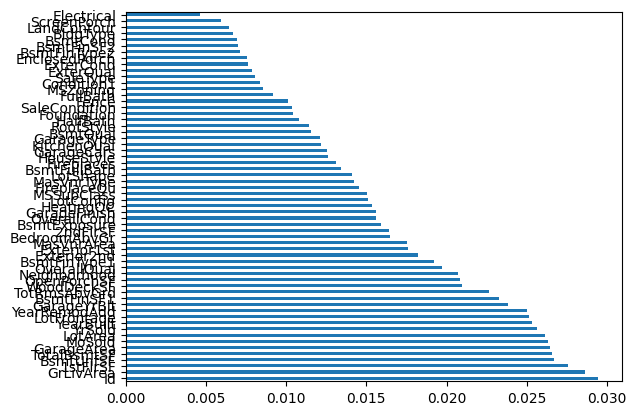

In [220]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(60).plot(kind='barh')
plt.show()

In [222]:
new_feat_imp=feat_importances.nlargest(60).index
new_feat_imp

Index(['Id', 'GrLivArea', '1stFlrSF', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea',
       'MoSold', 'LotArea', 'YrSold', 'YearBuilt', 'LotFrontage',
       'YearRemodAdd', 'GarageYrBlt', 'BsmtFinSF1', 'TotRmsAbvGrd',
       'WoodDeckSF', 'OpenPorchSF', 'Neighborhood', 'OverallQual',
       'BsmtFinType1', 'Exterior2nd', 'Exterior1st', 'MasVnrArea',
       'BedroomAbvGr', '2ndFlrSF', 'BsmtExposure', 'OverallCond',
       'GarageFinish', 'HeatingQC', 'LotConfig', 'MSSubClass', 'FireplaceQu',
       'MasVnrType', 'LotShape', 'BsmtFullBath', 'Fireplaces', 'HouseStyle',
       'GarageCars', 'KitchenQual', 'GarageType', 'BsmtQual', 'RoofStyle',
       'HalfBath', 'Foundation', 'SaleCondition', 'Fence', 'FullBath',
       'MSZoning', 'Condition1', 'SaleType', 'ExterQual', 'ExterCond',
       'EnclosedPorch', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtCond', 'BldgType',
       'LandContour', 'ScreenPorch', 'Electrical'],
      dtype='object')

In [223]:
new_feat=df[['Id', 'GrLivArea', '1stFlrSF', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea',
       'MoSold', 'LotArea', 'YrSold', 'YearBuilt', 'LotFrontage',
       'YearRemodAdd', 'GarageYrBlt', 'BsmtFinSF1', 'TotRmsAbvGrd',
       'WoodDeckSF', 'OpenPorchSF', 'Neighborhood', 'OverallQual',
       'BsmtFinType1', 'Exterior2nd', 'Exterior1st', 'MasVnrArea',
       'BedroomAbvGr', '2ndFlrSF', 'BsmtExposure', 'OverallCond',
       'GarageFinish', 'HeatingQC', 'LotConfig', 'MSSubClass', 'FireplaceQu',
       'MasVnrType', 'LotShape', 'BsmtFullBath', 'Fireplaces', 'HouseStyle',
       'GarageCars', 'KitchenQual', 'GarageType', 'BsmtQual', 'RoofStyle',
       'HalfBath', 'Foundation', 'SaleCondition', 'Fence', 'FullBath',
       'MSZoning', 'Condition1', 'SaleType', 'ExterQual', 'ExterCond',
       'EnclosedPorch', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtCond', 'BldgType',
       'LandContour', 'ScreenPorch', 'Electrical']]

In [173]:
new_feat.shape

(1460, 60)

In [174]:
Y.shape

(1460,)

In [242]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_feat, Y, test_size=0.2, random_state=42)

In [225]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, new_feat, Y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [240]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

In [178]:
"""from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)
print(lin_reg.score(X_test,y_test))"""


'from sklearn.linear_model import LinearRegression\n\nfrom sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error\n\nlin_reg = LinearRegression()\nlin_reg.fit(X_train, y_train)\npredictions = lin_reg.predict(X_test)\nprint(lin_reg.score(X_test,y_test))'

In [204]:
from sklearn.model_selection import cross_val_score

###########################
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}

lin_reg.score(X_test,y_test)

"""MAE: 21694.74758729657   60feat
MSE: 1172110449.007972
RMSE: 34236.09862422954
R2 Score: 0.8471889698889599
------------------------------
RMSE Cross-Validation: 41951374065883.63
0.8471889698889599"""


"""MAE: 21694.74758729657   drop null
MSE: 1172110449.007972
RMSE: 34236.09862422954
R2 Score: 0.8471889698889599
------------------------------
RMSE Cross-Validation: 41951374065883.63
0.8471889698889599"""
   
"""MAE: 21497.167027634026  40feat  0.1slit
MSE: 1158663355.8031657
RMSE: 34039.14446344334
R2 Score: 0.8489421017430141
------------------------------
RMSE Cross-Validation: 844223879651.9503"""

MAE: 20446.928831307243
MSE: 1327649337.737492
RMSE: 36436.922725958786
R2 Score: 0.8546895394470245
------------------------------
RMSE Cross-Validation: 34267.48297414369


'MAE: 21497.167027634026  40feat  0.1slit\nMSE: 1158663355.8031657\nRMSE: 34039.14446344334\nR2 Score: 0.8489421017430141\n------------------------------\nRMSE Cross-Validation: 844223879651.9503'

In [205]:
random_forest = RandomForestRegressor(n_estimators=90)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}

random_forest.score(X_test,y_test)

"""MAE: 17736.671130136987
MSE: 859174428.4305065
RMSE: 29311.677339082908
R2 Score: 0.8879872374103911
------------------------------
RMSE Cross-Validation: 29590.654124667915
0.8879872374103911"""


"""MAE: 17720.56993150685
MSE: 850461854.6573472
RMSE: 29162.6791405959
R2 Score: 0.8891231178850697
------------------------------
RMSE Cross-Validation: 29671.70167531803

 0.8879872374103911"""


"""MAE: 17587.84113013699  100
MSE: 852233427.0629605
RMSE: 29193.037304517675
R2 Score: 0.8888921534700291
------------------------------
RMSE Cross-Validation: 29697.62055540039"""


"""MAE: 17639.992465753425  90
MSE: 831378508.1599603
RMSE: 28833.635014683117
R2 Score: 0.8916110624629034
------------------------------
RMSE Cross-Validation: 29537.20082733623"""

MAE: 16066.178843226791
MSE: 866418399.3108102
RMSE: 29434.985974360683
R2 Score: 0.9051710018174098
------------------------------
RMSE Cross-Validation: 29543.57093671203


'MAE: 17639.992465753425  90\nMSE: 831378508.1599603\nRMSE: 28833.635014683117\nR2 Score: 0.8916110624629034\n------------------------------\nRMSE Cross-Validation: 29537.20082733623'

In [239]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}

xgb.score(X_test,y_test)


"""MAE: 15809.402129708904
MSE: 653116693.822725
RMSE: 25556.147867445223
R2 Score: 0.9148515100686654
------------------------------
RMSE Cross-Validation: 27811.642461042862"""



"""MAE: 15809.751070205479 
MSE: 653117964.2769077
RMSE: 25556.172723569303
R2 Score: 0.9148513444363118
------------------------------
RMSE Cross-Validation: 27811.628147624528
'MAE: 15809.402129708904\nMSE: 653116693.822"""



"""MAE: 15809.751070205479   40feat  0.1 test
MSE: 653117964.2769077
RMSE: 25556.172723569303
R2 Score: 0.9148513444363118
------------------------------
RMSE Cross-Validation: 27811.628147624528"""


MAE: 15824.314961472603
MSE: 654002610.230342
RMSE: 25573.474739079593
R2 Score: 0.9147360108860118
------------------------------
RMSE Cross-Validation: 26659.936435611315


'MAE: 15809.751070205479   40feat  0.1 test\nMSE: 653117964.2769077\nRMSE: 25556.172723569303\nR2 Score: 0.9148513444363118\n------------------------------\nRMSE Cross-Validation: 27811.628147624528'

In [238]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)


#calculate RMSE
print("rse",sqrt(mean_squared_error(y_test, predictions)))
print("mse",mean_squared_error(y_test, predictions))




rse 25573.474739079593
mse 654002610.230342


In [92]:
"""from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}

elastic_net.score(X_test,y_test)
"""


MAE: 20797.300951026366
MSE: 1242817814.8290517
RMSE: 35253.62130092527
R2 Score: 0.8379706701829022
------------------------------
RMSE Cross-Validation: 33616.19965001234


0.8379706701829022

In [44]:
"""from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor()
model_RFR.fit(X_train, y_train)
Y_pred = model_RFR.predict(X_test)
print(mean_absolute_error(y_test, Y_pred))


y_pred=model_RFR.score(X_test,y_test)
y_pred

"""

17418.08880136986


In [183]:
df_test=df_test[['Id', 'GrLivArea', 'BsmtUnfSF', 'MoSold', '1stFlrSF', 'LotArea',
       'TotalBsmtSF', 'GarageArea', 'LotFrontage', 'YearRemodAdd', 'YrSold',
       'YearBuilt', 'GarageYrBlt', 'BsmtFinSF1', 'TotRmsAbvGrd', 'WoodDeckSF',
       'OpenPorchSF', 'Neighborhood', 'OverallQual', 'BsmtFinType1',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', '2ndFlrSF', 'BedroomAbvGr',
       'BsmtExposure', 'GarageFinish', 'FireplaceQu', 'OverallCond',
       'LotConfig', 'HeatingQC', 'MSSubClass', 'Fireplaces', 'BsmtFullBath',
       'MasVnrType', 'LotShape', 'HouseStyle', 'KitchenQual', 'GarageCars',
       'GarageType', 'BsmtQual', 'RoofStyle', 'HalfBath', 'Foundation',
       'Fence', 'SaleCondition', 'FullBath', 'MSZoning', 'Condition1',
       'SaleType', 'ExterQual', 'BsmtFinType2', 'EnclosedPorch', 'ExterCond',
       'BsmtFinSF2', 'BsmtCond', 'LandContour', 'BldgType', 'ScreenPorch',
       'Electrical']]

In [184]:
df_test.shape

(1459, 60)

In [185]:
Y_Pred = xgb.predict(df_test)
Y_Pred

array([309490.22, 289742.8 , 475886.66, ..., 297010.03, 273414.38,
       475480.  ], dtype=float32)

In [186]:
sub = pd.DataFrame()
sub['Id'] = df_test['Id']
sub['SalePrice'] = Y_Pred

In [187]:
sub.to_csv("dod_60_new.csv",index=False)

In [188]:
zoz=pd.read_csv("/kaggle/working/dod_60_new.csv")
zoz.head()

,Id,SalePrice
0,1461,309490.22
1,1462,289742.80
2,1463,475886.66
3,1464,475832.28
4,1465,304624.06


In [229]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

In [232]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}


MAE: 21483.920796393933
MSE: 1158270967.5129669
RMSE: 34033.380195228434
R2 Score: 0.8489932584056643
------------------------------
RMSE Cross-Validation: 34079.052624693664


In [233]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}

MAE: 21496.038586552942
MSE: 1158670019.6251256
RMSE: 34039.24234798897
R2 Score: 0.8489412329635411
------------------------------
RMSE Cross-Validation: 34097.90294965215


In [ ]:
##############################################################

In [7]:
submission = pd.read_csv("/kaggle/input/ieee-eui-data-science-bootcamp/sample_submission.csv")

In [12]:
# drop missing values
missing = df_test.isnull().sum()
missing = missing[missing>0]
df.drop(missing.index, axis=1, inplace=True)
df.drop(['Electrical'], axis=1, inplace=True)

df_test.dropna(axis=1, inplace=True)
df_test.drop(['Electrical'], axis=1, inplace=True)

In [13]:
from tqdm import tqdm

len_test = tqdm(range(0, len(df_test)), desc='Matching')

for i in len_test:
    for j in range(0, len(df)):
        for k in range(1, len(df_test.columns)):
            if df_test.iloc[i, k] == df.iloc[j, k]:
                continue
            else:
                break
        else:
            submission.iloc[i, 1] = df.iloc[j, -1]
            break
        
len_test.close()

Matching: 100%|██████████| 1459/1459 [02:40<00:00,  9.12it/s]


In [15]:
submission.to_csv('submission2.csv', index=False)
submission.head(3)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
